# Main Concepts

- Approximation: $\hat{y} = wx+b$
- Cost Function (MSE): $MSE = J(w,b) = \frac{1}{N}\sum_{i=1}^n (y_i - (wx+b))^2$
- Minimizing - Get Gradient of the Cost Function: $J^{'}(w,b)$
    - $\frac{df}{dw} = \frac{1}{N}\sum_{i=1}^n -2x_i(y_i-(wx_i+b)) = \frac{1}{N}\sum_{i=1}^n2x_i(\hat{y}-y_i)$
    - $\frac{df}{db} = \frac{1}{N}\sum_{i=1}^n -2(y_i-(wx_i+b)) = \frac{1}{N}\sum_{i=1}^n2(\hat{y}-y_i)$
- Gradient Descent
- Update Rules
    - $w = w - \alpha \cdot dw$
    - $b = b - \alpha \cdot db$

# Code
- gradient calculation: converting sum of product into vector multiplication (dot product)
- with np.dot(a,b): need to manually check that the dimensions for the two arrays are compatible
- dimensions for these calculations
    - **input dimension: (n,m)**, where n is the number of data, m is the number of features
    - **self.weight: (m,)**, having one weight for each feature
    - **self.bias: scalar number**
    - **y_predicted (np.dot(X, self.weight) + self.bias): (n,)**, outputing n number of predictions
    - **dw: (m,)** same dimension as w, one derivative per weight --> **Transpose X**
    - **db: scaler** --> taking sum

In [13]:
import numpy as np
class LinearRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent iteration
        for _ in range(self.n_iters):
            # forward pass
            # approcimation for y
            y_predicted = np.dot(X, self.weights) + self.bias

            # backward pass
            # derivative
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * sum(y_predicted - y)

            # update weights and bias
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

# Test

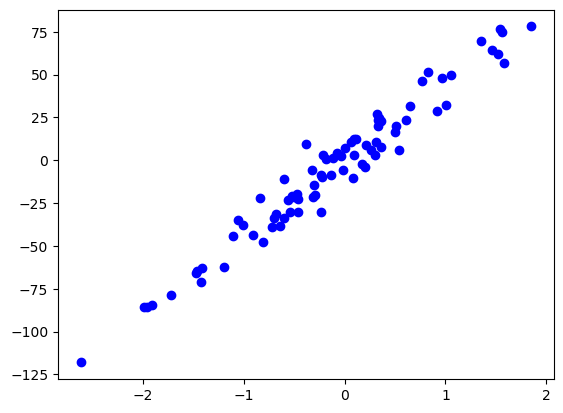

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig = plt.figure
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.show()

In [3]:
print(X_train.shape, y_train.shape)

(80, 1) (80,)


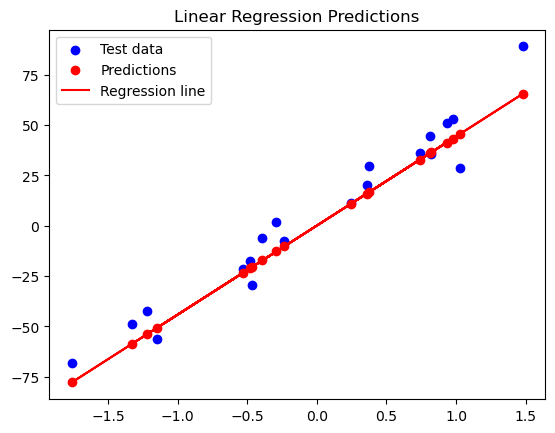

Weights: [44.22805336]
Bias: 0.09093417586062963
Mean Squared Error: 104.29708088608452


In [21]:
regressor = LinearRegression(lr=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
y_predicted = regressor.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.scatter(X_test, y_predicted, color='red', label='Predictions')
plt.plot(X_test, y_predicted, color='red', label='Regression line')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()
print("Weights:", regressor.weights)
print("Bias:", regressor.bias)

def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
mse = MSE(y_test, y_predicted)
print("Mean Squared Error:", mse)

/var/folders/54/ftmbf1r53bj2j6z2l781dlf00000gn/T/ipykernel_25969/1464297037.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


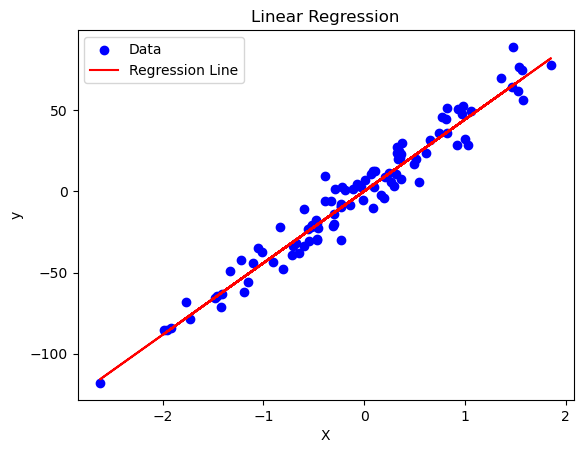

In [19]:
y_pred_line = regressor.predict(X)
cmap = plt.cm.get_cmap('coolwarm')
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_line, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()